# Importing

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive

import pickle

# Getting the files ready

In [2]:
!pwd

/content


In [3]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
!ls gdrive/MyDrive/DACybSec/project/data

'BitcoinHeistData 2.csv'   transaction_dataset.csv


In [5]:
data_root_dir = "gdrive/MyDrive/DACybSec/project/data/"

# Loading the dataset

In [6]:
df = pd.read_csv(data_root_dir + 'transaction_dataset.csv')

In [7]:
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.drop('Index', axis = 1, inplace=True)

In [8]:
df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [9]:
cols = list(df.columns)
cols

['Address',
 'FLAG',
 'Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total Ether sent',
 'total ether received',
 'total ether sent contracts',
 'total ether balance',
 ' Total ERC20 tnxs',
 ' ERC20 total Ether received',
 ' ERC20 total ether sent',
 ' ERC20 total Ether sent contract',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 uniq sent addr.1',
 ' ERC20 uniq rec contract addr',
 ' ERC20 avg time between sent tnx',
 ' ERC20 avg time between rec tnx',
 ' ERC20 avg time between rec 2 tnx',
 ' ERC20 avg time between contract t

# Exploring the ETH addresses

In [10]:
len(df)

9841

In [11]:
len(df['Address'].unique())

9816

### Percentage of the addresses that are unique (Have only 1 entry in the data)

In [12]:
(len(df['Address'].unique()) / len(df)) * 100

99.74596077634386

#### So, what's different in the addresses that have a repeat?

In [13]:
repeated_addresses = []
for address in df['Address'].unique():
    if(len(df[df['Address'] == address]) != 1):
        repeated_addresses.append(address)

In [14]:
repeated_addresses_df = df[df['Address'].isin(repeated_addresses)]

In [15]:
repeated_addresses_df[repeated_addresses_df['Address'] == '0x4c13f6966dc24c92489344f0fd6f0e61f3489b84']
cols_with_different_vals = []
no_repeat_address = []
max_n_repeats = 0
for address in repeated_addresses_df['Address']:
    if(len(repeated_addresses_df[repeated_addresses_df['Address'] == address]) > max_n_repeats):
        max_n_repeats = len(repeated_addresses_df[repeated_addresses_df['Address'] == address])
        
    n_repeats = 0
    for col in cols:
        in_focus = repeated_addresses_df[repeated_addresses_df['Address'] == address]
        if(in_focus.iloc[0][col] != in_focus.iloc[1][col]):
            cols_with_different_vals.append(col)
            n_repeats += 1
            
    if(n_repeats == 0):
        no_repeat_address.append(address)
        
list(set(cols_with_different_vals))

[' ERC20 most sent token type', ' ERC20_most_rec_token_type']

In [16]:
(df.drop('Address', axis=1))['FLAG'].unique()

array([0, 1])

In [17]:
len(df[df['FLAG'] == 1])

2179

In [18]:
df.dtypes

Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                            

# Building for bitcoin using ETH data

## Excluding the columns that represent the features that are not present in Bitcoin

In [19]:
# cols_to_exclude = ["Address"] #, "Number of Created Contracts", "min value sent to contract", "max val sent to contract", "avg value sent to contract"]
cols_to_exclude = {}
cols_to_exclude["Address"] = True

for col in cols:
    c = col.strip()
    if(c[:5].lower() == "erc20" or c[-8:].lower() == "contract" or c[-9:].lower() == "contracts"):
        cols_to_exclude[col] = True

In [20]:
cols_to_exclude

{' ERC20 avg time between contract tnx': True,
 ' ERC20 avg time between rec 2 tnx': True,
 ' ERC20 avg time between rec tnx': True,
 ' ERC20 avg time between sent tnx': True,
 ' ERC20 avg val rec': True,
 ' ERC20 avg val sent': True,
 ' ERC20 avg val sent contract': True,
 ' ERC20 max val rec': True,
 ' ERC20 max val sent': True,
 ' ERC20 max val sent contract': True,
 ' ERC20 min val rec': True,
 ' ERC20 min val sent': True,
 ' ERC20 min val sent contract': True,
 ' ERC20 most sent token type': True,
 ' ERC20 total Ether received': True,
 ' ERC20 total Ether sent contract': True,
 ' ERC20 total ether sent': True,
 ' ERC20 uniq rec addr': True,
 ' ERC20 uniq rec contract addr': True,
 ' ERC20 uniq rec token name': True,
 ' ERC20 uniq sent addr': True,
 ' ERC20 uniq sent addr.1': True,
 ' ERC20 uniq sent token name': True,
 ' ERC20_most_rec_token_type': True,
 'Address': True,
 'Number of Created Contracts': True,
 'avg value sent to contract': True,
 'max val sent to contract': True,


In [21]:
cols_to_consider_for_btc = []
for col in cols:
    if col not in cols_to_exclude:
        cols_to_consider_for_btc.append(col)

In [22]:
cols_to_consider_for_btc = cols_to_consider_for_btc[:-1]
cols_to_consider_for_btc

['FLAG',
 'Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'total Ether sent',
 'total ether received',
 'total ether balance']

In [23]:
X_btc = df[cols_to_consider_for_btc[1:]]
y_btc = df[cols_to_consider_for_btc[0]]

## Training the models for BTC convertable

#### Preparing the training and the test data

In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_btc, y_btc, test_size=0.20, random_state=42)

#### Training a random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=0)

In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [29]:
preds = list(clf.predict(X_test))

In [30]:
n_correct = 0
y_test = list(y_test)
for i in range(len(preds)):
    if(preds[i] == y_test[i]):
        n_correct += 1
        
print("Accuracy = " + str(n_correct/len(preds)))

Accuracy = 0.94667343829355


#### Model perfomrance analysis

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

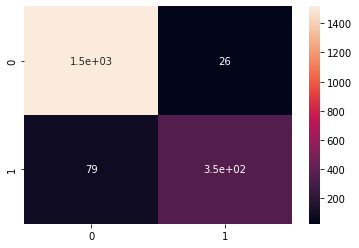

In [32]:
cfm = confusion_matrix(list(y_test), preds, labels=[0, 1])
sns.heatmap(cfm, annot=True)

In [33]:
print(classification_report(list(y_test), preds, target_names = ["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.95      0.98      0.97      1542
       Fraud       0.93      0.81      0.87       427

    accuracy                           0.95      1969
   macro avg       0.94      0.90      0.92      1969
weighted avg       0.95      0.95      0.95      1969



Precision

In [34]:
cfm[0][0] / (cfm[0][0] + cfm[1][0])

0.9504702194357367

Recall

In [35]:
cfm[0][0] / (cfm[0][0] + cfm[0][1])

0.9831387808041504

#### Saving the model

In [36]:
pickle.dump(clf, open("rfc_bitcoin.bin", "wb"))

In [37]:
from google.colab import files
files.download("rfc_bitcoin.bin")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysing the bitcoin data

## Getting the features required for the model from a bitcoin address

In [38]:
features_required_for_btc = cols_to_consider_for_btc[1:]
features_required_for_btc

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'total Ether sent',
 'total ether received',
 'total ether balance']

## Helper functions

### Conversion from bitcoin to ethereum

In [39]:
def get_value_in_eth(value_in_btc, conversion_rate = 13.69):
    return value_in_btc * conversion_rate

In [40]:
get_value_in_eth(20)

273.8

### Getting the required details from the account address

#### Account analytics
The functions below are used to provide some analytics about an account, based on the response from the blockchain.com APIs

In [41]:
# More helpers
def calculate_time_between_first_and_last_transactions(transactions):
    if(len(transactions) < 0):
        return 0
    
    last_trx_dt = datetime.fromtimestamp(transactions[0]["time"])
    first_trx_dt = datetime.fromtimestamp(transactions[-1]["time"])
    
    time_diff = (last_trx_dt - first_trx_dt).total_seconds()
    
    return time_diff / 60

def get_transaction_stats(transactions):
    unique_sent_to_addresses = set()
    n_sent = 0
    min_sent = float('inf')
    max_sent = -float('inf')
    total_sent = 0
    avg_sent = 0
    
    unique_received_from_addresses = set()
    n_received = 0
    min_received = float('inf')
    max_received = -float('inf')
    total_received = 0
    avg_received = 0
    
    for transaction in transactions:
        if(transaction["result"] < 0):
            n_sent += 1
            for sender in transaction["out"]:
                unique_sent_to_addresses.add(sender["addr"])
            
            amt = - transaction["result"]
            total_sent += amt
            min_sent = min(min_sent, amt)
            max_sent = max(max_sent, amt)
            
        else:
            n_received += 1
            for receiver in transaction["out"]:
                unique_received_from_addresses.add(receiver["addr"])
            
            amt = transaction["result"]
            total_received += amt
            min_received = min(min_sent, amt)
            max_received = max(max_sent, amt)
                
    min_received = 0 if min_received == float('inf') else min_received
    max_received = 0 if max_received == -float('inf') else max_received
    avg_received = total_received / n_received if n_received > 0 else 0
    
    min_sent = 0 if min_sent == float('inf') else min_sent
    max_sent = 0 if max_sent == -float('inf') else max_sent
    avg_sent = total_sent / n_sent if n_sent > 0 else 0
    
    return n_sent, n_received, len(unique_received_from_addresses), len(unique_sent_to_addresses), min_received, max_received, avg_received, min_sent, max_sent, avg_sent 
    
    

def calculate_average_time_between_transactions(transactions):
    if(len(transactions) < 2):
        return 0, 0
    else:
        # For sent transactions
        n_diff_count_for_sent = 0
        total_diffs_for_sent = 0
        prev_sent_trx_for_sent = None
        
        n_diff_count_for_received = 0
        total_diffs_for_received = 0
        prev_sent_trx_for_received = None
        
        for trx in transactions:
            if(trx["result"] < 0):
                if prev_sent_trx_for_sent == None:
                    prev_sent_trx_for_sent = trx
                    continue
                else:
                    t2_time = datetime.fromtimestamp(prev_sent_trx_for_sent["time"])
                    t1_time = datetime.fromtimestamp(trx["time"])
                    n_diff_count_for_sent += 1
                    total_diffs_for_sent += (t2_time - t1_time).total_seconds()
                    prev_sent_trx_for_sent = trx
                    
            else:
                if prev_sent_trx_for_received == None:
                    prev_sent_trx_for_received = trx
                    continue
                else:
                    t2_time = datetime.fromtimestamp(prev_sent_trx_for_received["time"])
                    t1_time = datetime.fromtimestamp(trx["time"])
                    n_diff_count_for_received += 1
                    total_diffs_for_received += (t2_time - t1_time).total_seconds()
                    prev_sent_trx_for_received = trx
                    
        
        avg_bw_sent_mins = (total_diffs_for_sent / n_diff_count_for_sent) / 60 if n_diff_count_for_sent != 0 else 0
        avg_bw_received_mins = (total_diffs_for_received / n_diff_count_for_received) / 60 if n_diff_count_for_received != 0 else 0
        
        return avg_bw_sent_mins, avg_bw_received_mins

#### Main

In [42]:
import requests
from datetime import datetime

'''
Needed:
['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'total Ether sent',
 'total ether received',
 'total ether balance']
'''

def get_account_summary(account_address, convert_to_eth = True):
    blockchain_info_response = requests.get("https://blockchain.info/rawaddr/" + account_address)

    response_status_code = blockchain_info_response.status_code
    
    if response_status_code != 200:
        print("Got to an error: " + str(blockchain_info_response))
        if response_status_code == 429:
          raise Exception("The API does not allow you to make too many requests")
        else:
          raise Exception("The requested Bitcoin address does not exist")
        
    full_account_details = blockchain_info_response.json()
    
    avg_time_bw_sent_trxs, avg_time_bw_rec_trxs = calculate_average_time_between_transactions(full_account_details["txs"])
    td_bw_fandl_trxs = calculate_time_between_first_and_last_transactions(full_account_details["txs"])
    n_sent, n_received, unique_received_from_addresses, unique_sent_to_addresses, min_received, max_received, avg_received, min_sent, max_sent, avg_sent = get_transaction_stats(full_account_details["txs"])
    # print((n_sent, n_received, unique_received_from_addresses, unique_sent_to_addresses, min_received, max_received, avg_received, min_sent, max_sent, avg_sent))
    total_sent = full_account_details["total_sent"]
    total_received = full_account_details["total_received"]
    total_balance = full_account_details["final_balance"]

    div = 100000000

    if convert_to_eth == True:
      ret_data = [
        avg_time_bw_sent_trxs,
        avg_time_bw_rec_trxs,
        td_bw_fandl_trxs,
        n_sent,
        n_received,
        unique_received_from_addresses,
        unique_sent_to_addresses,
        get_value_in_eth(min_received/div),
        get_value_in_eth(max_received/div),
        get_value_in_eth(avg_received/div),
        get_value_in_eth(min_sent/div),
        get_value_in_eth(max_sent/div),
        get_value_in_eth(avg_sent/div),
        get_value_in_eth(total_sent/div),
        get_value_in_eth(total_received/div),
        get_value_in_eth(total_balance/div),
      ]

    else:
      ret_data = [
        avg_time_bw_sent_trxs,
        avg_time_bw_rec_trxs,
        td_bw_fandl_trxs,
        n_sent,
        n_received,
        unique_received_from_addresses,
        unique_sent_to_addresses,
        min_received/div,
        max_received/div,
        avg_received/div,
        min_sent/div,
        max_sent/div,
        avg_sent/div,
        total_sent/div,
        total_received/div,
        total_balance/div,
      ]

    return ret_data
    

In [43]:
acc_summary = get_account_summary("bc1q87ct56gem5v459kqyfdytnktx2vu7mgkfff70h6rpjmlq9km8lvqseazak")
# acc_summary = get_account_summary("bc1qsqa7qnfj28fzhwhjd8r85n2y97lta5xg6aktx2")
acc_summary

[20892.591666666667,
 4211.8592592592595,
 89978.21666666666,
 5,
 19,
 724,
 6,
 0.1361391098,
 6.9812059170000005,
 0.7430857929894736,
 0.1361391098,
 6.9812059170000005,
 2.81450987798,
 14.072549389899999,
 14.118630066800002,
 0.0460806769]

### Sample prediction for ETH

In [44]:
pred = clf.predict(np.array(list(X_test.iloc[0])).reshape(1, -1))
pred[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [45]:
def is_fraud_by_rf_clf(feature_val_list):
  pred = clf.predict(np.array(feature_val_list).reshape(1, -1))
  return pred

## Testing out (manually)

In [46]:
is_fraud_by_rf_clf(get_account_summary("bc1q87ct56gem5v459kqyfdytnktx2vu7mgkfff70h6rpjmlq9km8lvqseazak"))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [47]:
address = [
  "bc1q87ct56gem5v459kqyfdytnktx2vu7mgkfff70h6rpjmlq9km8lvqseazak",
  "134r8iHv69xdT6p5qVKTsHrcUEuBVZAYak", # Blacklisted as it belongs to North Korea or something
  "15shyVcYAeZeXu1aMEKdBH62wHJjdqkRXW", # the guy who stole from me
  "bc1qsqa7qnfj28fzhwhjd8r85n2y97lta5xg6aktx2", # mine
]

is_fraud_by_rf_clf(get_account_summary("bc1qwx65erq2tddwqkge0ylq4rkuteduzgcxuf4dq6"))[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

# Testing out with bitcoin fraud dataset
Downloaded from UC Irvine

In [48]:
from sklearn.cluster import KMeans

## Loading the data

In [49]:
btc_heist_df = pd.read_csv(data_root_dir + "BitcoinHeistData 2.csv")

In [50]:
btc_heist_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [51]:
btc_addresses = list(btc_heist_df['address'])

In [52]:
len(df)

9841

## Subsetting the columns

In [53]:
btc_heist_df.columns

Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'label'],
      dtype='object')

In [54]:
cols_to_consider = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
considered_df = btc_heist_df[cols_to_consider]

In [55]:
considered_df.head()

,length,weight,count,looped,neighbors,income
0,18,0.008333,1,0,2,100050000.0
1,44,0.000244,1,0,1,100000000.0
2,0,1.000000,1,0,2,200000000.0
3,72,0.003906,1,0,2,71200000.0
4,144,0.072848,456,0,1,200000000.0


## Training the model

In [56]:
X_train = considered_df[:5000]
X_clf = considered_df[5000:]

In [57]:
btc_kmeans_clf = KMeans(n_clusters=2, random_state=0)
btc_kmeans_clf.fit(X_train)

KMeans(n_clusters=2, random_state=0)